# **Importing Libraries**

In [1]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# **Loading the Dataset**

In [2]:
# Load the dataset from the CSV file
df = pd.read_csv('/content/Iris.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


# **Exploratory Data Analysis (EDA)**


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

Missing values in each column:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Descriptive Statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.8

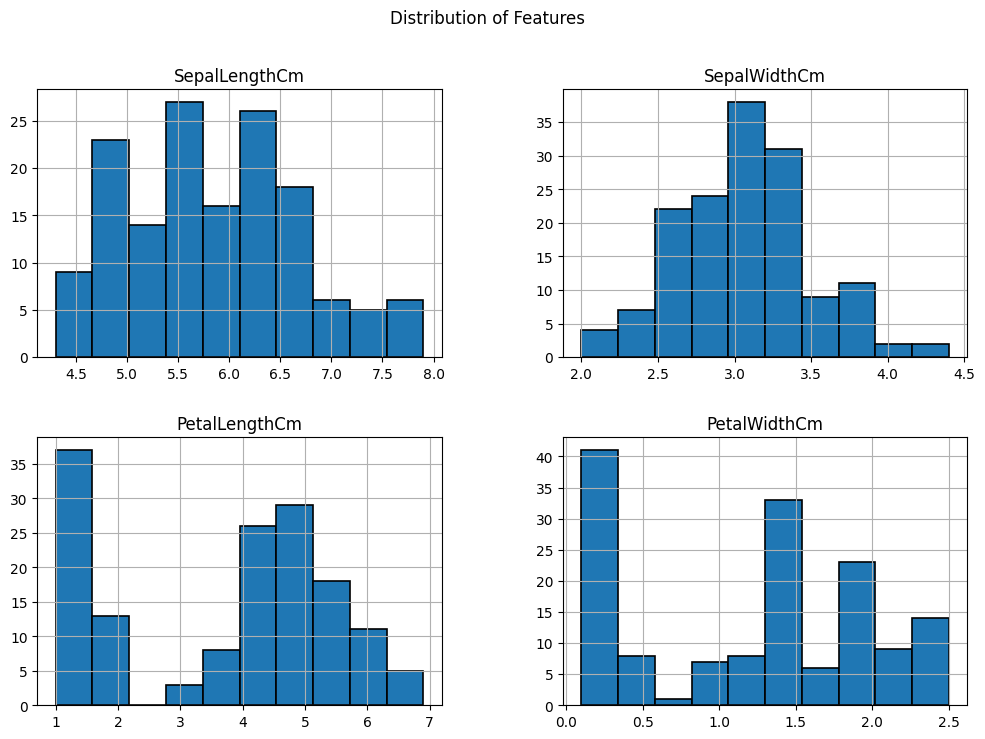

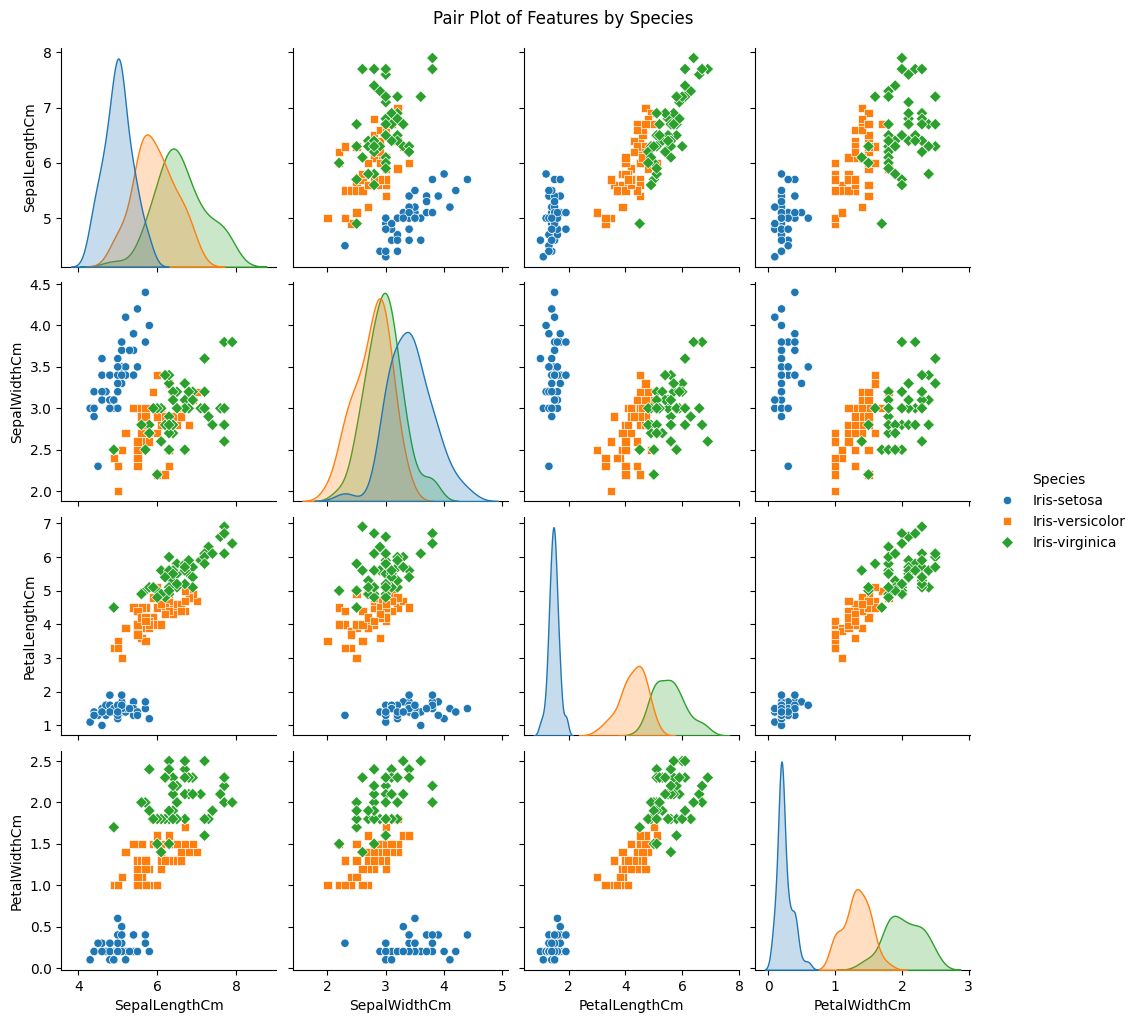

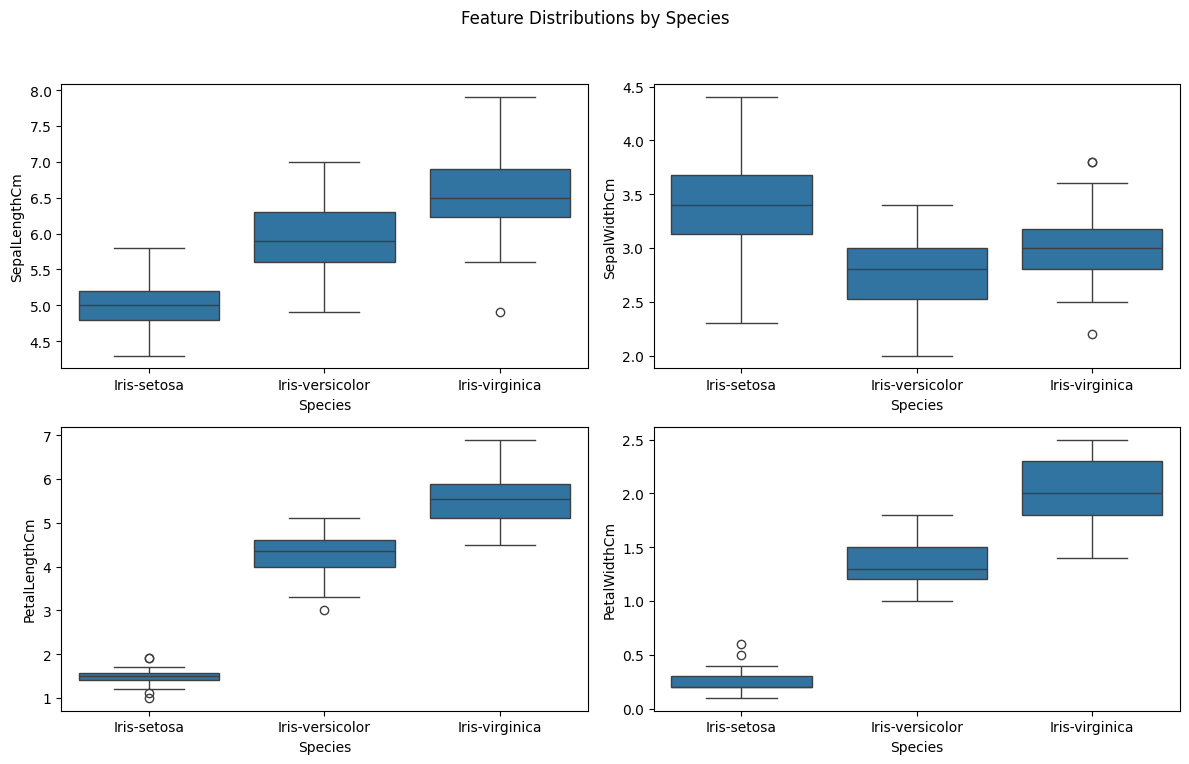

In [4]:
# --- 3.1: Data Inspection ---

# Get a concise summary of the dataframe
print("\nDataset Information:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Get descriptive statistics for the numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# The 'Id' column is not needed for classification, so we can drop it


# Check the distribution of the target variable 'Species'
print("\nDistribution of Species:")
print(df['Species'].value_counts())


# --- 3.2: Data Visualization ---

# Visualize the distribution of each feature using histograms
df.hist(edgecolor='black', linewidth=1.2, figsize=(12, 8))
plt.suptitle('Distribution of Features')
plt.show()

# Visualize the relationships between features using a pair plot
# This helps to see how species are separated by feature combinations
sns.pairplot(df, hue='Species', markers=["o", "s", "D"])
plt.suptitle('Pair Plot of Features by Species', y=1.02)
plt.show()

# Visualize the feature distributions for each species using box plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='Species', y='SepalLengthCm', data=df)
plt.subplot(2, 2, 2)
sns.boxplot(x='Species', y='SepalWidthCm', data=df)
plt.subplot(2, 2, 3)
sns.boxplot(x='Species', y='PetalLengthCm', data=df)
plt.subplot(2, 2, 4)
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.suptitle('Feature Distributions by Species')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Data Preprocessing**

In [5]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Encode the 'Species' column
df['Species'] = le.fit_transform(df['Species'])

# Display the first 5 rows to show the encoded column
print("\nDataset after encoding 'Species' column:")
print(df.head())


Dataset after encoding 'Species' column:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            5.1           3.5            1.4           0.2        0
1            4.9           3.0            1.4           0.2        0
2            4.7           3.2            1.3           0.2        0
3            4.6           3.1            1.5           0.2        0
4            5.0           3.6            1.4           0.2        0


# **Model Training and Evaluation**

In [6]:
# --- 5.1: Splitting the Data ---

# Separate features (X) and target (y)
X = df.drop(columns=['Species'])
y = df['Species']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


# --- 5.2: Training and Evaluating Models ---

# 1. Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f"\nLogistic Regression Accuracy: {lr_accuracy * 100:.2f}%")

# 2. K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")

# 3. Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"Support Vector Machine Accuracy: {svm_accuracy * 100:.2f}%")

# 4. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")


Training data shape: (105, 4)
Testing data shape: (45, 4)

Logistic Regression Accuracy: 100.00%
K-Nearest Neighbors Accuracy: 100.00%
Support Vector Machine Accuracy: 100.00%
Decision Tree Accuracy: 100.00%


# **Model Comparison**

In [7]:
# Create a dictionary to store model accuracies
accuracies = {
    'Logistic Regression': lr_accuracy,
    'K-Nearest Neighbors': knn_accuracy,
    'Support Vector Machine': svm_accuracy,
    'Decision Tree': dt_accuracy
}

# Find the model with the highest accuracy
best_model_name = max(accuracies, key=accuracies.get)
best_accuracy = accuracies[best_model_name]

print(f"\n--- Model Comparison Summary ---")
print(f"The best performing model is: {best_model_name} with an accuracy of {best_accuracy * 100:.2f}%.")


--- Model Comparison Summary ---
The best performing model is: Logistic Regression with an accuracy of 100.00%.
